# Projeto de Regressão Logística


Neste projeto estaremos trabalhando com um conjunto de dados falso de publicidade, indicando se um usuário de internet específico clicou ou não em uma propaganda. Vamos tentar criar um modelo que preveja se clicará ou não em um anúncio baseado nos recursos desse usuário.

Este conjunto de dados contém os seguintes recursos:

* 'Daily Time Spent on Site': tempo no site em minutos.
* 'Age': idade do consumidor.
* 'Area Income': Média da renda do consumidor na região.
* 'Daily Internet Usage': Média em minutos por di que o consumidor está na internet.
* 'Linha do tópico do anúncio': Título do anúncio.
* 'City': Cidade do consumidor.
* 'Male': Se o consumidor era ou não masculino.
* 'Country': País do consumidor.
* 'Timestamp': hora em que o consumidor clicou no anúncio ou janela fechada.
* 'Clicked on Ad'': 0 ou 1 indicam se clicou ou não no anúncio.

## Importar bibliotecas

** Importe algumas bibliotecas que você acha que você precisará **

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Obter dados
** Leia o arquivo advertising.csv e grave-o em um DataFrame chamado ad_data. **

In [155]:
ad_data = pd.read_csv('advertising.csv')

** Verifique o cabeçalho do ad_data **

** Use info() e describe() em ad_data **

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Análise de dados exploratória

Vamos usar Seaborn para explorar os dados!

Tente recriar os gráficos abaixo.

** Crie um histograma de "Age" **

(10, 70)

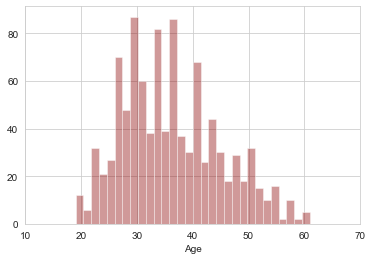

In [19]:
sns.set_style('whitegrid')
ax = sns.distplot(ad_data['Age'],kde=False,bins=30,color='darkred')
ax.set_xlim(10,70)

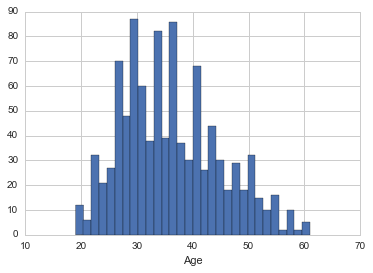

** Crie um joinplot mostrando "Area Income" versus "Age" **

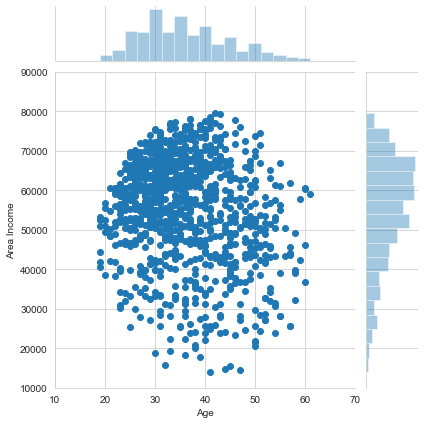

In [27]:
ax = sns.jointplot(x='Age', y='Area Income', data=ad_data,xlim = (10,70)
                  ,ylim=(10000,90000),)

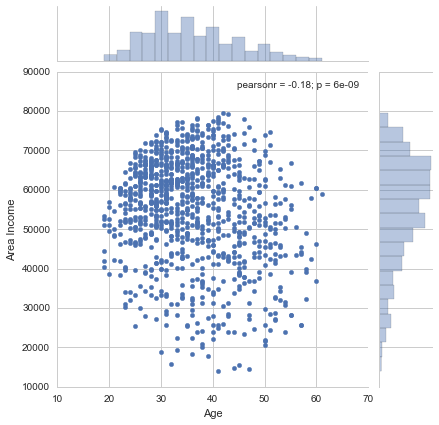

** Crie um jointplot que mostre as distribuições KDE do "Daily Time spent" no site vs "Age". **

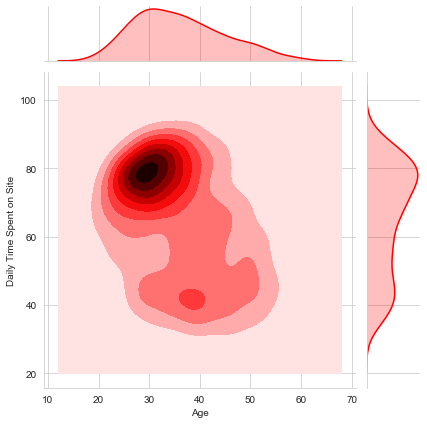

In [35]:
ax = sns.jointplot(x='Age', y='Daily Time Spent on Site',data=ad_data,
                  kind = 'kde',color='red')

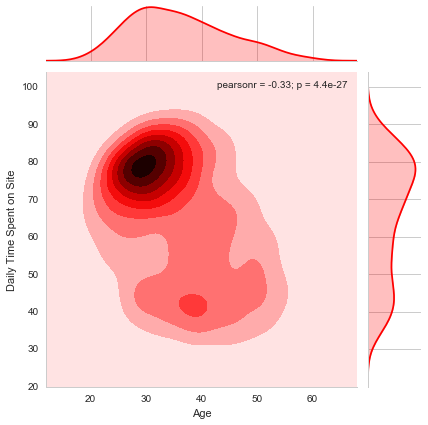

** Crie um jointplot do 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

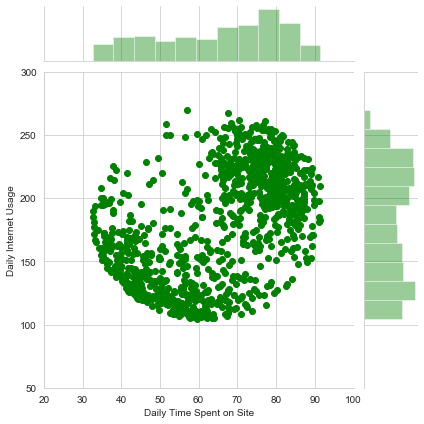

In [38]:
ax = sns.jointplot(x = 'Daily Time Spent on Site',y='Daily Internet Usage',
                  data=ad_data, color='green',xlim=(20,100),ylim=(50,300))

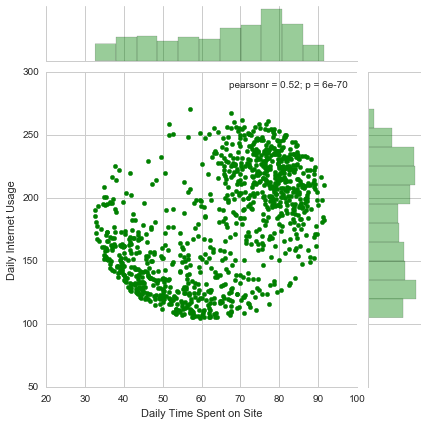

** Finalmente, crie um parplot com o matiz definido pelo recurso de coluna 'Clicked on Ad'. **

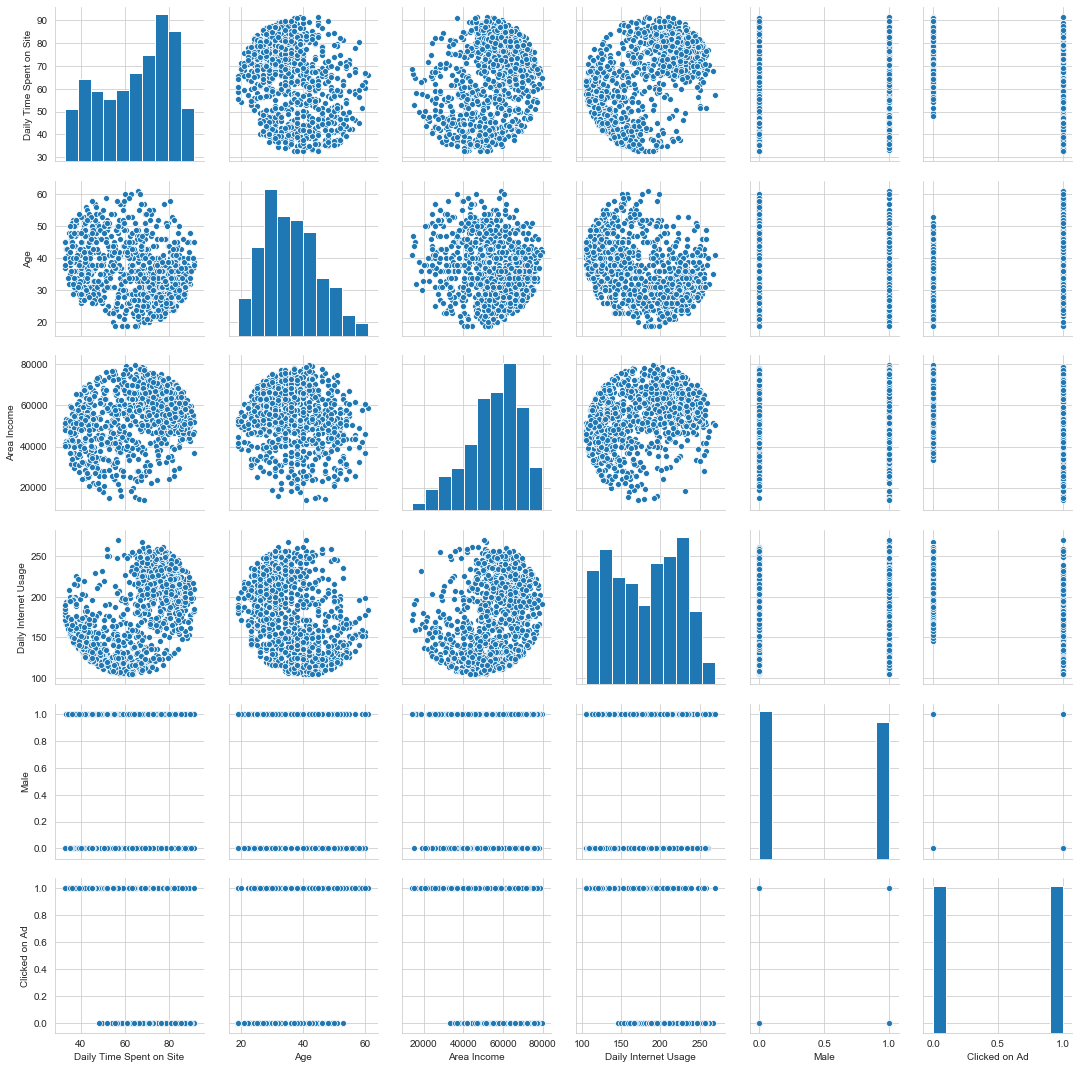

In [41]:
ax = sns.pairplot(data=ad_data,palette = "Paired")

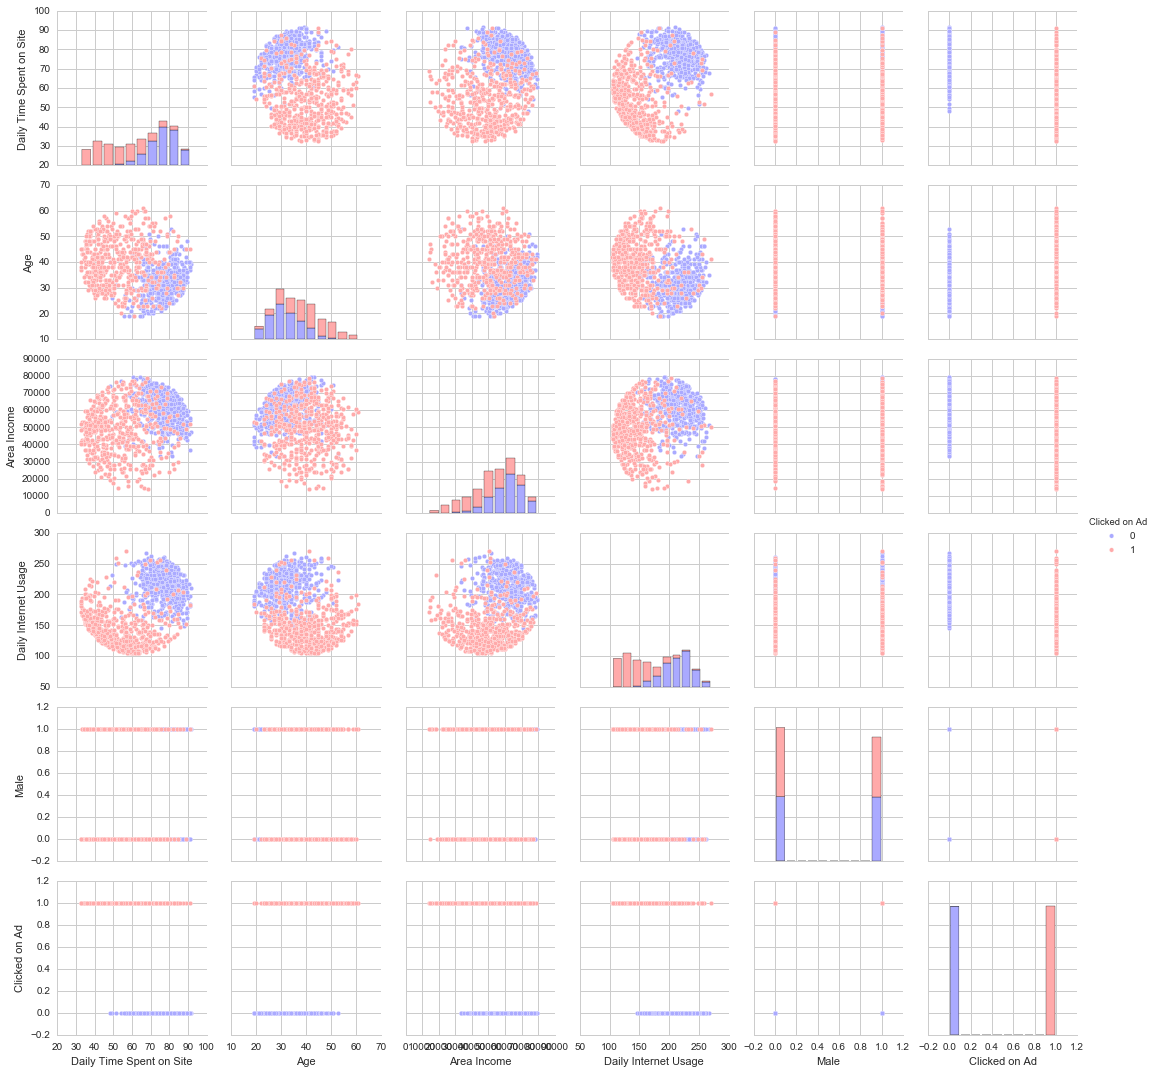


# Regressão Logística

Agora é hora de quebrar nossos dados em treino e teste e fitar nosso modelo.

Você terá a liberdade aqui para escolher colunas em que deseja treinar!

** Divida os dados em conjunto de treinamento e conjunto de testes usando train_test_split **

In [51]:
ad_data.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

In [157]:
timestamp = ad_data[['Timestamp']]

In [158]:
timestamp = timestamp.apply(pd.to_datetime)

In [159]:
timestamp

,Timestamp
0,2016-03-27 00:53:11
1,2016-04-04 01:39:02
2,2016-03-13 20:35:42
3,2016-01-10 02:31:19
4,2016-06-03 03:36:18
...,...
995,2016-02-11 21:49:00
996,2016-04-22 02:07:01
997,2016-02-01 17:24:57
998,2016-03-24 02:35:54


In [160]:
def return_time_range(x):
    
    import datetime
    complete_hour =  x.time()
    
    if complete_hour>datetime.time(0,0,1) and complete_hour < datetime.time(6,0,0):
        
        # Madrugada = 0
        return int(0)
    
    elif complete_hour>datetime.time(6,0,1) and complete_hour < datetime.time(12,0,0):
        
        # Manhã = 1
        return int(1)
    
    elif complete_hour>datetime.time(12,0,1) and complete_hour < datetime.time(18,0,0):
        
        # Tarde = 2
        return int(2)
    
    elif complete_hour>datetime.time(18,0,1) and complete_hour <= datetime.time(23,59,59):
        
        # Noite = 4
        return int(3)

    
def return_dayofweek(x):
    
    return x.dayofweek

In [161]:
timestamp['Time Range'] = timestamp['Timestamp'].apply(return_time_range)
timestamp['Day of Week'] = timestamp['Timestamp'].apply(return_dayofweek)
del timestamp['Timestamp']

In [162]:
ad_data = pd.concat([ad_data,timestamp], axis=1)

In [165]:
ad_data.head(4)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Time Range,Day of Week
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,3,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0,6


In [164]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Time Range', 'Day of Week'],
      dtype='object')

In [166]:
x_complete = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male','Time Range', 'Day of Week']]

In [168]:
y_complete = ad_data[['Clicked on Ad']]

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
# Subdivisao dos dados:
# Este método retorna uma tuple com 4 valores (x_train, x_test, y_train,y_test)
x_train, x_test, x_train,y_test = train_test_split(x_complete,y_complete,test_size=0.4,random_state=101)

** Treine e ajuste um modelo de regressão logística no conjunto de treinamento. **

In [175]:
from sklearn.linear_model import LogisticRegression 

In [176]:
logreg = LogisticRegression()

In [178]:
logreg.fit(x_train,y_train)

C:\Users\DigaoSuplementos\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DigaoSuplementos\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Previsões e avaliações
** Agora preveja valores para os dados de teste. **

In [179]:
predict = logreg.predict(x_test)

** Crie um relatório de classificação para o modelo. **

In [181]:
from sklearn.metrics import classification_report

In [182]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       206
           1       0.92      0.89      0.90       194

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

